In [198]:
from datetime import datetime

In [199]:
#####################################################
# Define Portfolio Holdings Class
#####################################################

# For Portfolio
# keep all holdings, total portfolio valuation
class Portfolio:
  def __init__(self):
    self.holdings = {} # ticker, quantity in portfolio
    self.avg_price = {} # Based on average costing

  def add_trades(self,trade): #Each trade contains 1 transaction containing details of the trade

    #Portfolio is a list of dictionary containing each trade,

    ticker = trade.get('ticker').upper()
    qty = trade.get('qty')
    trade_price = trade.get('trade_price')
    trade_date = trade.get('trade_date')

    #Update average price first, before updating qty. If purchase, update avg price. If sale, keep average price. If qty = 0, remove from avg_price.
    if qty>0:
      self.avg_price[ticker] =  (self.avg_price.get(ticker,0)*self.holdings.get(ticker,0) + qty*trade_price) / (self.holdings.get(ticker,0) + qty)
    elif self.holdings.get(ticker,0) + qty == 0:
      self.avg_price.pop(ticker)

    self.holdings[ticker] = self.holdings.get(ticker, 0) + qty

    #Update cash if purchasing/selling securities
    if ticker != 'CASH':
      self.holdings['CASH'] = self.holdings.get('CASH',0) - qty*trade_price

  def portfolio_value(self,report_date,historical_price ):
    self.report_date = report_date
    self.NAV =  sum( [ historical_price.get_price(ticker,report_date) *qty for ticker,qty in self.holdings.items()  ] ) #value is 1 if it is cash
    return self.NAV

  def __str__(self):
    return f'''NAV as of {self.report_date} is {self.NAV} '''


# For ticker prices - class Prices will contain dictionary of all prices of tickers
# - Take daily dates as list
# - Take ticker
# - take closing price

class Prices:
  def __init__(self):
    self.price_data = {}  # {ticker: (trade_date, price)}

  def add_price(self,ticker,trade_date,prices):
    self.price_data.setdefault(ticker, {})[date] = price

  def get_price(self,ticker,trade_date):
    price = self.price_data.get(ticker,{}).get(trade_date,1)
    return price





In [200]:
###### Create trade blotter class - keep all trades

class TradeBlotter():

  def __init__(self):
    self.trade_blotter = []


  def add_trade(self,ticker,qty,trade_price,trade_date):

    self.trade_blotter.append({'ticker':ticker.upper(),
                               'qty': qty,
                               'trade_price': trade_price,
                               'trade_date': trade_date })

  def get_trades_before_date(self,report_date): #Report date in YYYY-MM-DD string format
    return [txn for txn in self.trade_blotter if datetime.strptime(txn['trade_date'], "%Y-%M-%d") <= datetime.strptime(report_date, "%Y-%M-%d") ]




In [201]:
#######################################
# Input Stock prices into historical price - for holdings generation
#######################################

stock_prices_jan_2025 = {
"AAPL_US":{
    "2024-12-31": 250.42,
    "2025-01-02": 243.85,
    "2025-01-03": 243.36,
    "2025-01-06": 245.00,
    "2025-01-07": 242.21,
    "2025-01-08": 242.70,
    "2025-01-10": 236.85,
    "2025-01-13": 234.40,
    "2025-01-14": 233.28,
    "2025-01-15": 237.87,
    "2025-01-16": 228.26,
    "2025-01-17": 229.98,
    "2025-01-21": 222.64,
    "2025-01-22": 223.83,
    "2025-01-23": 223.66,
    "2025-01-24": 222.78,
    "2025-01-27": 229.86,
    "2025-01-28": 238.26,
    "2025-01-29": 239.36,
    "2025-01-30": 237.59,
    "2025-01-31": 236.00
},
 "TSLA_US":{
    "2024-12-31": 403.84,
    "2025-01-02": 379.28,
    "2025-01-03": 410.44,
    "2025-01-06": 411.05,
    "2025-01-07": 394.36,
    "2025-01-08": 394.94,
    "2025-01-10": 394.74,
    "2025-01-13": 391.92,
    "2025-01-14": 388.66,
    "2025-01-15": 390.12,
    "2025-01-16": 386.45,
    "2025-01-17": 389.77,
    "2025-01-21": 380.15,
    "2025-01-22": 378.30,
    "2025-01-23": 377.88,
    "2025-01-24": 375.90,
    "2025-01-27": 381.52,
    "2025-01-28": 388.26,
    "2025-01-29": 392.60,
    "2025-01-30": 390.13,
    "2025-01-31": 388.22
}
}

trade_date = ['2024-12-31','2025-01-02','2025-01-03',
              '2025-01-06','2025-01-07','2025-01-08','2025-01-10',
              '2025-01-13','2025-01-14','2025-01-15','2025-01-16','2025-01-17',
              '2025-01-21','2025-01-22','2025-01-23','2025-01-24',
              '2025-01-27','2025-01-28','2025-01-29','2025-01-30','2025-01-31']


historical_price = Prices()

#Adding in apple and tesla price only
for ticker in ['AAPL_US','TSLA_US']:
  for date in trade_date:
    price = stock_prices_jan_2025.get(ticker.upper()).get(date)
    # print(ticker,date,price)
    historical_price.add_price(ticker,date,price)

# historical_price.price_data



In [212]:
####################################
# Trade blotter - keep all trades
####################################

######################### Portfolio 1
portfolio1_trades = TradeBlotter()

portfolio1_trades.add_trade('cash', 50000, 1,"2024-12-31")
portfolio1_trades.add_trade('AAPL_US', 100, 250.00, "2025-01-02")
portfolio1_trades.add_trade('AAPL_US', 30, 250.00,"2025-01-02")
portfolio1_trades.add_trade('AAPL_US', 50, 230.00,"2025-01-02")
portfolio1_trades.add_trade('TSLA_US', 50, 400.00,"2025-01-08")
portfolio1_trades.add_trade('TSLA_US', -15, 370.00,"2025-01-22")
portfolio1_trades.add_trade('TSLA_US', 5, 360.00,"2025-01-23")
portfolio1_trades.add_trade('AAPL_US', -50, 230.00,"2025-01-24")

######################### Portfolio 2
portfolio2_trades = TradeBlotter()

portfolio2_trades.add_trade('cash', 20000, 1,"2024-12-31")
portfolio2_trades.add_trade('AAPL_US', 10, 250.00, "2025-01-02")
portfolio2_trades.add_trade('AAPL_US', 20, 250.00,"2025-01-02")
portfolio2_trades.add_trade('AAPL_US', 10, 230.00,"2025-01-02")


# portfolio1_trades.trade_blotter

In [228]:
########## Calculate Portfolio NAV

def get_portfolio_returns(portfolio_trades,trade_date,historical_price):
  ##
  # Input:
  #  - portfolio_trades - all trades in portfolio
  #  - trade_date - date range to calculate returns for
  #  - historical_price - historical price
  # Output:
  # returns_df - contains report_date and net asset value

  portfolio = Portfolio()
  portfolio_NAV = []
  portfolio_TWR = []

  for date in trade_date:
    # Pull txns from blotter from current date
    list_of_trades = [txn for txn in portfolio_trades.trade_blotter if txn['trade_date'] == date ]

    #Add trade to portfolio
    for txn in list_of_trades:
      portfolio.add_trades(txn)

    # Calculate NAV
    today_NAV = portfolio.portfolio_value(date,historical_price )
    portfolio_NAV += [today_NAV]

    #Calculate TWR
    if len(portfolio_TWR) == 0:
      portfolio_TWR += [1]
    else:
      portfolio_TWR += [ today_NAV / portfolio_NAV[-2] * portfolio_TWR[-1] ]

  returns_df = pd.DataFrame(data = {'report_date': trade_date , 'NAV': portfolio_TWR})

  return returns_df

returns_df1 = get_portfolio_returns(portfolio1_trades, trade_date, historical_price)
returns_df2 = get_portfolio_returns(portfolio2_trades, trade_date, historical_price)


In [229]:
returns_df1.head(1)

,report_date,NAV
0,2024-12-31,1.0


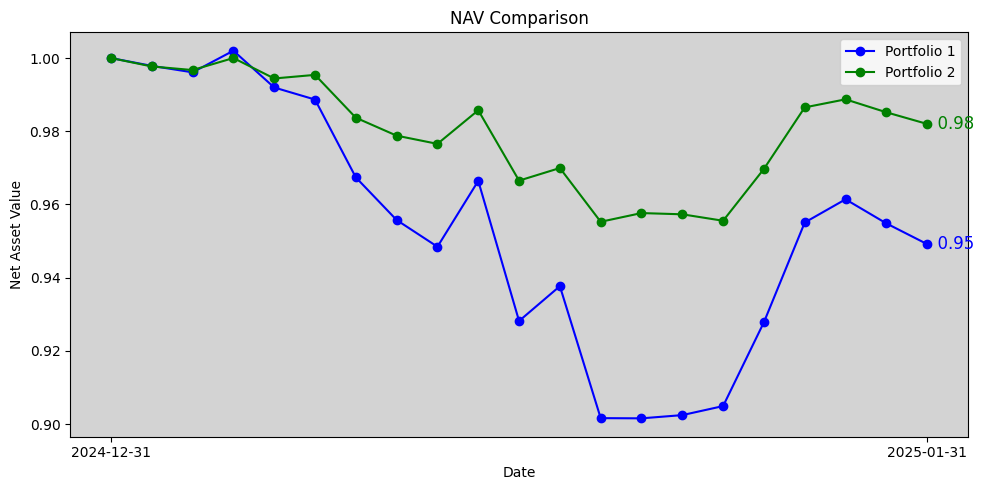

In [243]:
####################################
# Plot NAV Evolution of Portfolio1 and Portfolio 2
####################################

plt.figure(figsize=(10, 5))

# Setting the background color of the plot
ax = plt.gca()  # Get the current axes
ax.set_facecolor("lightgrey")

plt.plot(returns_df1['report_date'], returns_df1['NAV'], label='Portfolio 1', color='blue', marker='o')
plt.plot(returns_df2['report_date'], returns_df2['NAV'], label='Portfolio 2', color='green', marker='o')

plt.title('NAV Comparison')
plt.xlabel('Date')
plt.ylabel('Net Asset Value')
plt.legend()

# # Set only first and last x-tick
first_date = returns_df['report_date'].iloc[0]
last_date = returns_df['report_date'].iloc[-1]
plt.xticks([first_date, last_date])

# Label last point of Portfolio 1
last_x1 = returns_df1.index[-1]
last_y1 = returns_df1['NAV'].iloc[-1]
plt.text(last_x1, last_y1, f'  {last_y1:,.2f}', va='center', ha='left', fontsize=12, color='blue')

# Label last point of Portfolio 2
last_x2 = returns_df2.index[-1]
last_y2 = returns_df2['NAV'].iloc[-1]
plt.text(last_x2, last_y2, f'  {last_y2:,.2f}', va='center', ha='left', fontsize=12, color='green')

# plt.grid(True)
plt.tight_layout()
plt.show()
